# Multi-Layer Perceptron

## Import

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler

## Code

In [33]:
# Récupération des données en spécifiant le séparateur

TRAIN_FILE_PATH = "./data/ECG200_TRAIN.tsv"
TEST_FILE_PATH = "./data/ECG200_TEST.tsv"

train_df = pd.read_csv(TRAIN_FILE_PATH, delimiter='\t', header=None).dropna()
test_df = pd.read_csv(TEST_FILE_PATH, delimiter='\t', header=None).dropna()

# Passage des classes -1/1 à 0/1

train_df[0] = train_df[0].replace(-1, 0)
test_df[0] = test_df[0].replace(-1, 0)

# Séparation en données d'entraînement et données de test

X_train, y_train = train_df.loc[:, '1':], train_df.loc[:, :'0']
X_test, y_test = test_df.loc[:, '1':], test_df.loc[:, :'0']

# Normalisation des données

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 96)]              0         
                                                                 
 dense_12 (Dense)            (None, 16)                1552      
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,569
Trainable params: 1,569
Non-trainable params: 0
_________________________________________________________________


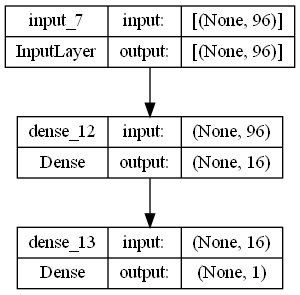

In [34]:
# Construction du MLP

input_shape = X_train.shape[1:]
nb_classes = y_train.shape[1]

input_layer = tf.keras.layers.Input(input_shape)

hidden_layer = tf.keras.layers.Dense(units=16, activation='sigmoid')(input_layer)

output_layer = tf.keras.layers.Dense(units=nb_classes, activation='softmax')(hidden_layer)

# Création du modèle

model_mlp = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

model_mlp.summary()
tf.keras.utils.plot_model(model_mlp, show_shapes=True)

In [35]:
# Compilation du modèle

learning_rate = 0.001
optimizer_algo = tf.keras.optimizers.Adam(learning_rate=learning_rate)

cost_function = tf.keras.losses.categorical_crossentropy

model_mlp.compile(loss=cost_function, optimizer=optimizer_algo, metrics=['accuracy'])

In [36]:
# Entraînement du modèle

nb_epochs = 300
mini_batch_size = 32
percentage_of_train_as_validation = 0.2
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best-model.h5', monitor='val_loss', save_best_only=True)

history_mlp = model_mlp.fit(X_train, y_train, batch_size=mini_batch_size,
                            epochs=nb_epochs, verbose=True,
                            validation_split=percentage_of_train_as_validation,
                            callbacks=[model_checkpoint])

Epoch 1/300
3/3 [==============================] - 1s 109ms/step - loss: 0.0000e+00 - accuracy: 0.7250 - val_loss: 0.0000e+00 - val_accuracy: 0.5500
Epoch 2/300
3/3 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.7250 - val_loss: 0.0000e+00 - val_accuracy: 0.5500
Epoch 3/300
3/3 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.7250 - val_loss: 0.0000e+00 - val_accuracy: 0.5500
Epoch 4/300
3/3 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - accuracy: 0.7250 - val_loss: 0.0000e+00 - val_accuracy: 0.5500
Epoch 5/300
3/3 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - accuracy: 0.7250 - val_loss: 0.0000e+00 - val_accuracy: 0.5500
Epoch 6/300
3/3 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.7250 - val_loss: 0.0000e+00 - val_accuracy: 0.5500
Epoch 7/300
3/3 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - accuracy: 0.7250 - val_los

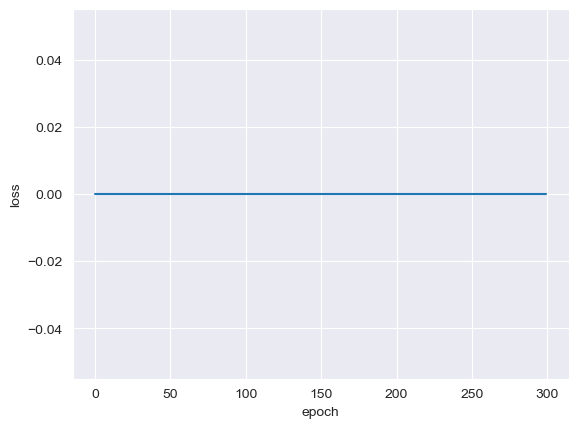

In [39]:
history_dict = history_mlp.history
loss_epochs = history_dict['loss']

plt.figure()
plt.plot(loss_epochs)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
plt.close()

In [38]:
# Test de la précision du modèle

model = tf.keras.models.load_model('best-model.h5')
loss,acc = model.evaluate(X_test,y_test)

print("La précision sur l'ensemble du test est:",acc)

4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6400
La précision sur l'ensemble du test est: 0.6399999856948853
